# Libary import

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [7]:
df = pd.read_csv('../../documents_data.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'].str.split().str[0], format='%Y-%m-%d')
df = df[df['Content'].notna()]

In [5]:
df.shape

(121861, 9)

In [6]:
df.to_csv('documents_data.csv', index=False)

In [5]:
df.sort_values(by='Date', inplace=True)

In [6]:
df['President'].unique()

array(['Harry S Truman', 'Dwight D. Eisenhower', 'Richard Nixon',
       'John F. Kennedy', 'Lyndon B. Johnson', 'Ronald Reagan',
       'Jimmy Carter', 'Gerald R. Ford', 'George Bush',
       'William J. Clinton', 'George W. Bush', 'Barack Obama',
       'Joseph R. Biden', 'Donald J. Trump'], dtype=object)

In [7]:
df['Date']

83604   1945-04-12
83603   1945-04-12
83607   1945-04-13
83605   1945-04-13
83606   1945-04-13
           ...    
25510   2024-09-19
25511   2024-09-19
25512   2024-09-19
25513   2024-09-19
25514   2024-09-19
Name: Date, Length: 121861, dtype: datetime64[ns]

In [8]:
# Filter documents from October 1960
df_oct_1960 = df[(df['Date'].dt.year == 1960) & (df['Date'].dt.month == 10)]

# Display the results

In [9]:
df_oct_1960

,Title,Date,Content,Citation,President,Categories,Attributes,Location,Link
97350,Excerpts of Speech by the Vice President at Ar...,1960-10-01,"On Thursday, Senator Kennedy made a major addr...","Richard Nixon, Excerpts of Speech by the Vice ...",Richard Nixon,"Vice Presidential, Remarks by the Vice Preside...","Campaign Remarks & Rallies, Vice Presidents,",NaN,https://www.presidency.ucsb.edu/documents/exce...
90909,"Remarks of Senator John F. Kennedy, Bean Feed,...",1960-10-01,"Senator KENNEDY. Governor Freeman, Senator Hum...","John F. Kennedy, Remarks of Senator John F. Ke...",John F. Kennedy,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies,",NaN,https://www.presidency.ucsb.edu/documents/rema...
90908,Excerpts from Remarks of Senator John F. Kenne...,1960-10-01,Our task is to pursue a policy of patiently en...,"John F. Kennedy, Excerpts from Remarks of Sena...",John F. Kennedy,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies,",NaN,https://www.presidency.ucsb.edu/documents/exce...
90906,"Remarks of Senator John F. Kennedy, City Hall,...",1960-10-01,"Senator KENNEDY. Ladies and gentlemen, Members...","John F. Kennedy, Remarks of Senator John F. Ke...",John F. Kennedy,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies,",NaN,https://www.presidency.ucsb.edu/documents/rema...
90905,"Speech of Senator John F. Kennedy, Polish-Amer...",1960-10-01,"Senator KENNEDY. Mr. President, Mayor Daley, C...","John F. Kennedy, Speech of Senator John F. Ken...",John F. Kennedy,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies,",NaN,https://www.presidency.ucsb.edu/documents/spee...
...,...,...,...,...,...,...,...,...,...
91162,"Remarks of Senator John F. Kennedy, Bonds for ...",1960-10-31,"Senator KENNEDY. Madam Chairwoman, Mrs. Harman...","John F. Kennedy, Remarks of Senator John F. Ke...",John F. Kennedy,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies,",NaN,https://www.presidency.ucsb.edu/documents/rema...
91168,Statement by Senator John F. Kennedy on Balanc...,1960-10-31,The recent flurry of speculation on the London...,"John F. Kennedy, Statement by Senator John F. ...",John F. Kennedy,"Presidential Candidates, Elections and Transit...",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...
91166,Excerpts from Senator John F. Kennedy's Speech...,1960-10-31,There is one week left in this campaign - and ...,"John F. Kennedy, Excerpts from Senator John F....",John F. Kennedy,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies,",NaN,https://www.presidency.ucsb.edu/documents/exce...
91163,"Remarks of Senator John F. Kennedy, Reyburn Pl...",1960-10-31,"Senator KENNEDY. Mayor Dilworth, Senator Clark...","John F. Kennedy, Remarks of Senator John F. Ke...",John F. Kennedy,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies,",NaN,https://www.presidency.ucsb.edu/documents/rema...


In [10]:
df.head()

,Title,Date,Content,Citation,President,Categories,Attributes,Location,Link
83604,Harry S Truman Event Timeline,1945-04-12,Harry S. Truman (33) Event Timeline 04/12/1945...,"Harry S Truman, Harry S Truman Event Timeline ...",Harry S Truman,"Timeline,",NaN,NaN,https://www.presidency.ucsb.edu/documents/harr...
83603,Statement by the President After Taking the Oa...,1945-04-12,THE WORLD may be sure that we will prosecute t...,"Harry S Truman, Statement by the President Aft...",Harry S Truman,"Presidential, Statements,",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...
83607,Executive Order 9538—Authorizing Certification...,1945-04-13,By virtue of the authority vested in me by sec...,"Harry S Truman, Executive Order 9538—Authorizi...",Harry S Truman,"Presidential, Written Presidential Orders, Exe...","Executive Orders,",NaN,https://www.presidency.ucsb.edu/documents/exec...
83605,Proclamation 2648—Announcing the Death of Fran...,1945-04-13,\nTo the People of the United States:\nIt has ...,"Harry S Truman, Proclamation 2648—Announcing t...",Harry S Truman,"Presidential, Written Presidential Orders, Pro...","Proclamation,",NaN,https://www.presidency.ucsb.edu/documents/proc...
83606,Executive Order 9539—Reinstating Avra M. Warre...,1945-04-13,By virtue of and pursuant to the authority ves...,"Harry S Truman, Executive Order 9539—Reinstati...",Harry S Truman,"Presidential, Written Presidential Orders, Exe...","Executive Orders,",NaN,https://www.presidency.ucsb.edu/documents/exec...


# Regex based matching

In [11]:
# miu_phrases = [
#     r"\bmade in usa\b", r"\bmade in america\b", r"\bmade in u\.s\.\b", r"\bmade in us\b",
#     r"\bamerican made\b", r"\busa made\b", r"\bu\.s\. made\b", r"\bus made\b",
#     r"\bbuy american\b", r"\bbuy usa\b", r"\bbuy america\b",
#     r"\bsupport america\b", r"\bsupport usa\b", r"\bsupport u\.s\.\b",
#     r"\bpatriot\w*\b",  # Matches "patriot", "patriotic", etc.
#     r"\bchoose american\b", r"\bchoose usa\b", r"\bchoose u\.s\.\b", r"\bchoose america\b",
#     r"\bnational pride\b",
#     r"\busa based\b", r"\bamerica based\b", r"\bamerican based\b", r"\bus based\b", r"\bu\.s\. based\b",
#     r"\busa produced\b", r"\bamerica produced\b", r"\bamerican produced\b", r"\bus produced\b", r"\bu\.s\. produced\b",
#     r"\busa manufactured\b", r"\bamerica manufactured\b", r"\bamerican manufactured\b", r"\bus manufactured\b", r"\bu\.s\. manufactured\b",
#     r"\bamerican worker\w*\b", r"\bamerican job\w*\b",
#     r"\bveteran\w* owned\b", r"\bveteran\w* founded\b", r"\bfounded by veteran\w*\b",
#     r"\bhandcrafted in america\b", r"\bhandcrafted in usa\b", r"\bhandcrafted in u\.s\.\b", r"\bhandcrafted in us\b",
#     r"\bcrafted in america\b", r"\bcrafted in usa\b", r"\bcrafted in u\.s\.\b", r"\bcrafted in us\b",
#     r"\bamerica\w* heritage\b", r"\bamerica\w* tradition\b", r"\bamerica\w* value\b",
#     r"\bicon of america\w*\b", r"\bicon of usa\b", r"\bicon of u\.s\.\b",
#     r"\bamerica\w* manufactur\w*\b", r"\bu\.s\. manufactur\w*\b"
# ]


miu_phrases = [
    r"\bmade in usa\b", r"\bmade in america\b", r"\bmade in u\.s\.\b", r"\bmade in us\b",
    r"\bamerican made\b", r"\busa made\b", r"\bu\.s\. made\b", r"\bus made\b",
    r"\bbuy american\b", r"\bbuy usa\b", r"\bbuy america\b",
    r"\bsupport america\b", r"\bsupport usa\b", r"\bsupport u\.s\.\b",
    r"\bchoose american\b", r"\bchoose usa\b", r"\bchoose u\.s\.\b", r"\bchoose america\b",
    r"\bnational pride\b",
    r"\busa based\b", r"\bamerica based\b", r"\bamerican based\b", r"\bus based\b", r"\bu\.s\. based\b",
    r"\busa produced\b", r"\bamerica produced\b", r"\bamerican produced\b", r"\bus produced\b", r"\bu\.s\. produced\b",
    r"\busa manufactured\b", r"\bamerica manufactured\b", r"\bamerican manufactured\b", r"\bus manufactured\b", r"\bu\.s\. manufactured\b",
    r"\bamerican worker\w*\b", r"\bamerican job\w*\b",
    r"\bveteran\w* owned\b", r"\bveteran\w* founded\b", r"\bfounded by veteran\w*\b",
    r"\bhandcrafted in america\b", r"\bhandcrafted in usa\b", r"\bhandcrafted in u\.s\.\b", r"\bhandcrafted in us\b",
    r"\bcrafted in america\b", r"\bcrafted in usa\b", r"\bcrafted in u\.s\.\b", r"\bcrafted in us\b",
    r"\bamerica\w* heritage\b", r"\bamerica\w* tradition\b", r"\bamerica\w* value\b",
    r"\bicon of america\w*\b", r"\bicon of usa\b", r"\bicon of u\.s\.\b",
    r"\bamerica\w* manufactur\w*\b", r"\bu\.s\. manufactur\w*\b"
]

In [12]:
# Create a regex pattern by joining all phrases
miu_regex = re.compile('|'.join(miu_phrases), re.IGNORECASE)

# Function to count matches in 'Content' column
df['matches'] = df['Content'].apply(lambda x: len(miu_regex.findall(x)))

# Create a 'Month' column to group by month
# df['Month'] = df['Date'].dt.to_period('M')

In [15]:
df['Month'] = df['Date'].dt.to_period('M')

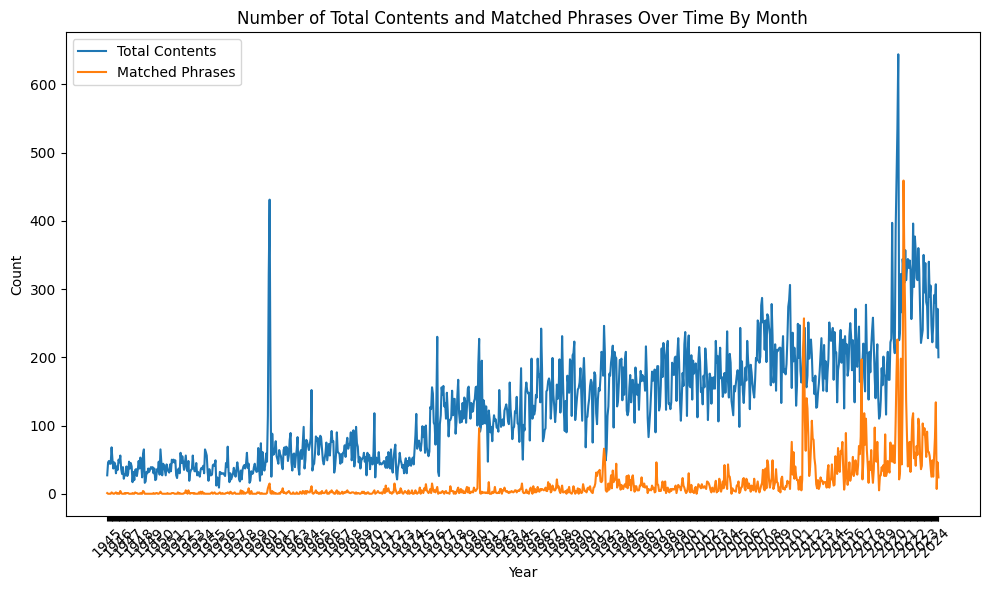

In [16]:
# Ensure 'Month' is in datetime format
# df['Month'] = pd.to_datetime(df['Month'])

# Exclude the last month (assuming df['Month'] is sorted)
last_month = df['Month'].max()
df_filtered = df[df['Month'] < last_month]

# Group by month and calculate the total contents and matched phrases
monthly_stats = df_filtered.groupby('Month').agg(
    total_contents=('Content', 'size'),
    matched_phrases=('matches', 'sum')
).reset_index()

monthly_stats['fraction_matched'] = monthly_stats['matched_phrases'] / monthly_stats['total_contents']
monthly_stats['Year'] = monthly_stats['Month'].dt.year  # Extract the year from the 'Month' column

# Plot the results as a line chart without dots at every point
plt.figure(figsize=(10, 6))
plt.plot(monthly_stats['Month'].astype(str), monthly_stats['total_contents'], label='Total Contents')
plt.plot(monthly_stats['Month'].astype(str), monthly_stats['matched_phrases'], label='Matched Phrases')

# Modify xticks to only show the year (every 12 months) for cleaner labeling
xticks_labels = [monthly_stats['Month'].iloc[i].strftime('%Y') if i % 12 == 0 else '' for i in range(len(monthly_stats))]
plt.xticks(ticks=range(len(monthly_stats)), labels=xticks_labels, rotation=45)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Total Contents and Matched Phrases Over Time By Month')
plt.legend()
plt.tight_layout()
plt.savefig('monthly_stats_plot.png')

# Save the monthly_stats DataFrame to a CSV file
monthly_stats.to_csv('monthly_stats.csv', index=False)

plt.show()


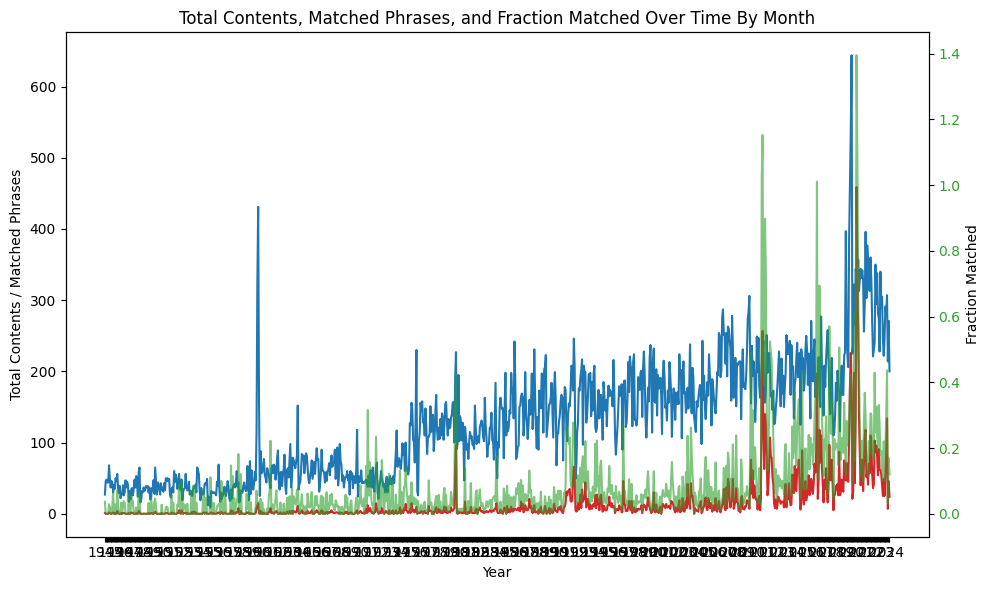

In [17]:
# Create the plot for monthly total contents, matched phrases, and fraction matched on the same graph

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total contents and matched phrases on the same axis
ax1.plot(monthly_stats['Month'].astype(str), monthly_stats['total_contents'], label='Total Contents', color='tab:blue')
ax1.plot(monthly_stats['Month'].astype(str), monthly_stats['matched_phrases'], label='Matched Phrases', color='tab:red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Contents / Matched Phrases')
ax1.tick_params(axis='y')

# Create a twin axis for fraction of matched phrases
ax2 = ax1.twinx()
ax2.plot(monthly_stats['Month'].astype(str), monthly_stats['fraction_matched'], label='Fraction Matched', color='tab:green', alpha=0.6)
ax2.set_ylabel('Fraction Matched')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Modify xticks to only show the year (every 12 months) for cleaner labeling
xticks_labels = [monthly_stats['Month'].iloc[i].strftime('%Y') if i % 12 == 0 else '' for i in range(len(monthly_stats))]
plt.xticks(ticks=range(len(monthly_stats)), labels=xticks_labels, rotation=45)

plt.title('Total Contents, Matched Phrases, and Fraction Matched Over Time By Month')

plt.savefig('monthly_stats_plot.png')
fig.tight_layout()
plt.show()


In [18]:
monthly_stats['Month']

0      1945-04
1      1945-05
2      1945-06
3      1945-07
4      1945-08
        ...   
948    2024-04
949    2024-05
950    2024-06
951    2024-07
952    2024-08
Name: Month, Length: 953, dtype: period[M]

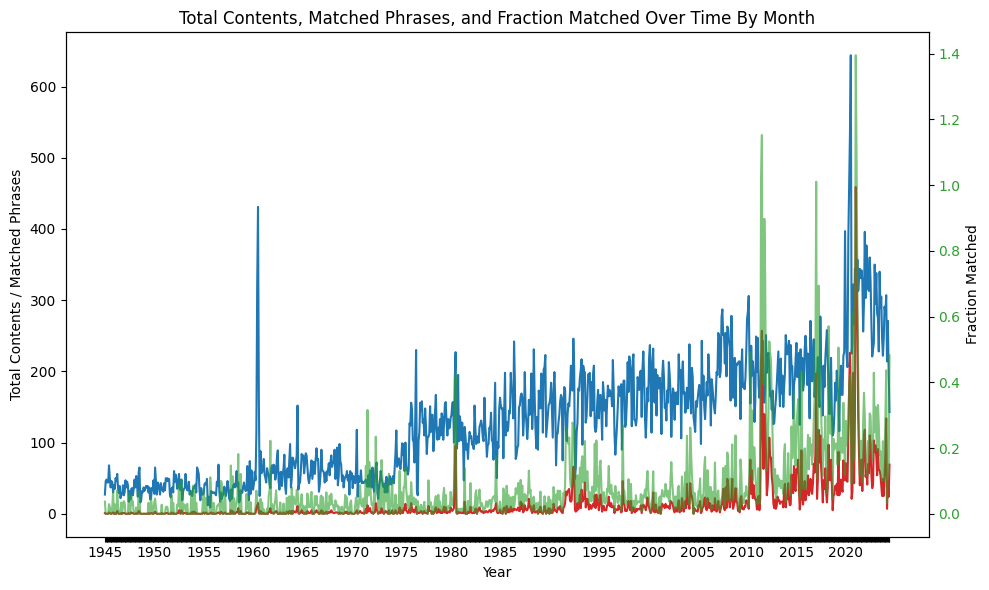

In [19]:
try:
    df['Month'] = pd.to_datetime(df['Month'].dt.to_timestamp())
except AttributeError:
    pass


# Convert 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')


# Group by month and calculate the total contents and matched phrases
monthly_stats = df.groupby('Month').agg(
    total_contents=('Content', 'size'),
    matched_phrases=('matches', 'sum')
).reset_index()

# Calculate the fraction of matched phrases
monthly_stats['fraction_matched'] = monthly_stats['matched_phrases'] / monthly_stats['total_contents']

# Create the plot for monthly total contents, matched phrases, and fraction matched on the same graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total contents and matched phrases on the same axis
ax1.plot(monthly_stats['Month'].astype(str), monthly_stats['total_contents'], label='Total Contents', color='tab:blue')
ax1.plot(monthly_stats['Month'].astype(str), monthly_stats['matched_phrases'], label='Matched Phrases', color='tab:red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Contents / Matched Phrases')
ax1.tick_params(axis='y')

# Create a twin axis for fraction of matched phrases
ax2 = ax1.twinx()
ax2.plot(monthly_stats['Month'].astype(str), monthly_stats['fraction_matched'], label='Fraction Matched', color='tab:green', alpha=0.6)
ax2.set_ylabel('Fraction Matched')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Modify xticks to show only every 3rd year for clearer labeling, while keeping all data points
xticks_labels = [monthly_stats['Month'].iloc[i].strftime('%Y') if i % 60 == 0 else '' for i in range(len(monthly_stats))]
plt.xticks(ticks=range(len(monthly_stats)), labels=xticks_labels, rotation=45)

plt.title('Total Contents, Matched Phrases, and Fraction Matched Over Time By Month')

plt.savefig('monthly_stats_plot.png')

fig.tight_layout()
plt.show()

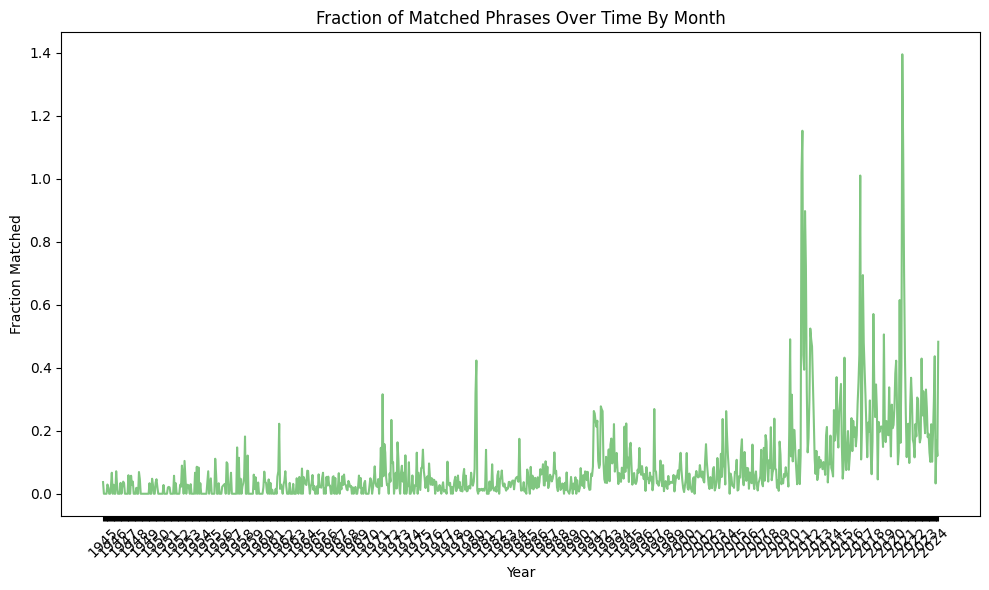

In [20]:
# Create a plot for the fraction matched for all months of the year

# Plot the fraction matched for all months
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the fraction of matched phrases for every month
ax.plot(monthly_stats['Month'].astype(str), monthly_stats['fraction_matched'], label='Fraction Matched', color='tab:green', alpha=0.6)
ax.set_xlabel('Year')
ax.set_ylabel('Fraction Matched')

# Modify xticks to only show the year (every 12 months) for cleaner labeling
xticks_labels = [monthly_stats['Month'].iloc[i].strftime('%Y') if i % 12 == 0 else '' for i in range(len(monthly_stats))]
plt.xticks(ticks=range(len(monthly_stats)), labels=xticks_labels, rotation=45)

plt.title('Fraction of Matched Phrases Over Time By Month')

plt.savefig('fraction_matched_plot.png')
fig.tight_layout()
plt.show()


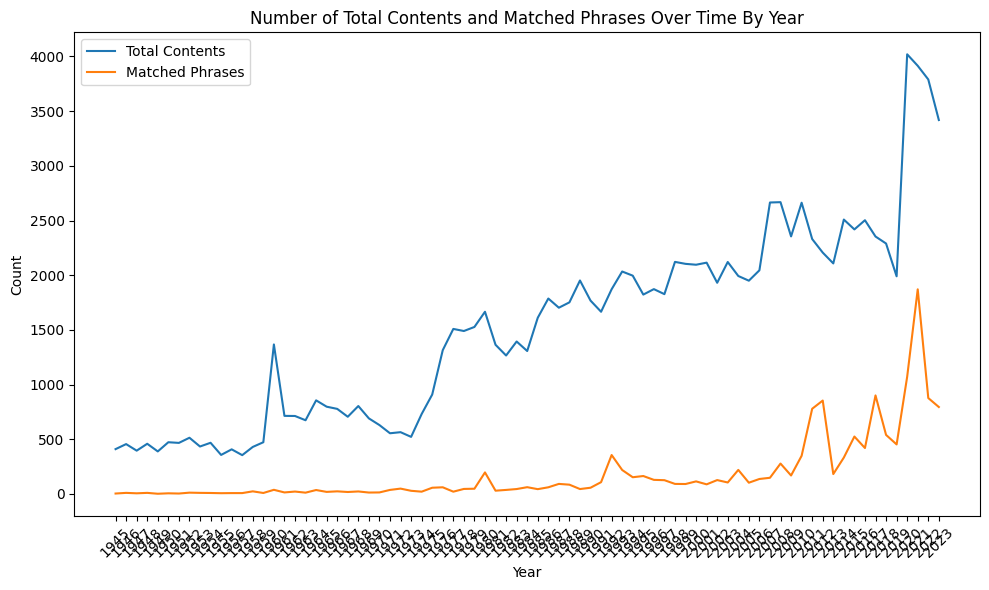

In [21]:
# Convert the 'Month' column to a datetime object if it's in PeriodDtype
try:
    df['Month'] = pd.to_datetime(df['Month'].dt.to_timestamp())
except AttributeError:
    pass

# Extract the year from the 'Month' column
df['Year'] = df['Month'].dt.year

# Exclude the last year (assuming df['Year'] is sorted)
last_year = df['Year'].max()
df_filtered = df[df['Year'] < last_year]

# Group by year and calculate the total contents and matched phrases
yearly_stats = df_filtered.groupby('Year').agg(
    total_contents=('Content', 'size'),
    matched_phrases=('matches', 'sum')
).reset_index()

# Plot the results as a line chart without dots at every point
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats['Year'].astype(str), yearly_stats['total_contents'], label='Total Contents')
plt.plot(yearly_stats['Year'].astype(str), yearly_stats['matched_phrases'], label='Matched Phrases')

# Modify xticks to only show the year for cleaner labeling
plt.xticks(ticks=range(len(yearly_stats)), labels=yearly_stats['Year'].astype(str), rotation=45)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Total Contents and Matched Phrases Over Time By Year')
plt.legend()
plt.tight_layout()
plt.savefig('yearly_stats_plot.png')

# Save the yearly_stats DataFrame to a CSV file
yearly_stats.to_csv('yearly_stats.csv', index=False)

plt.show()


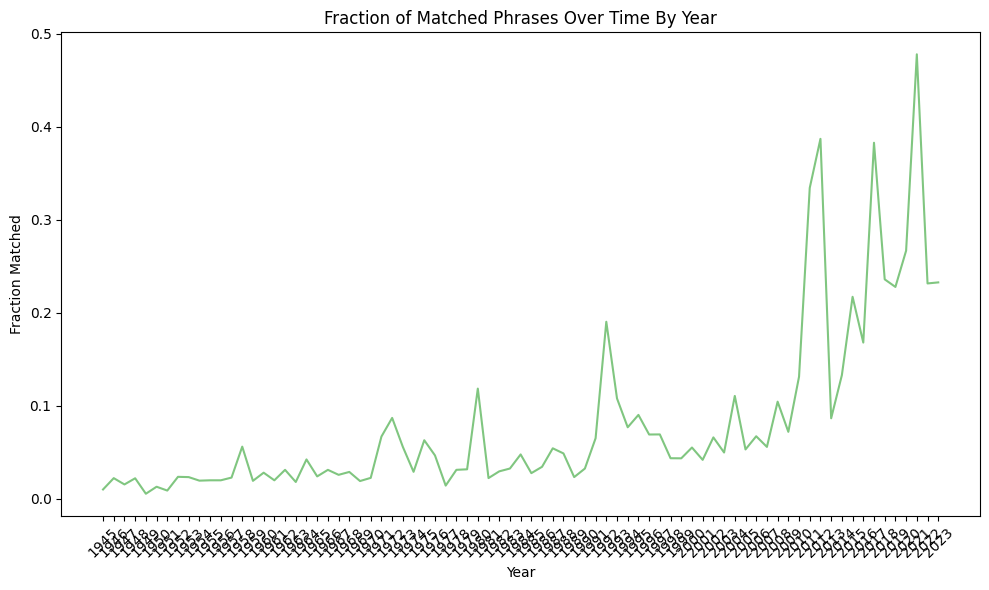

In [22]:
# Convert the 'Month' column to datetime
try:
    df['Month'] = pd.to_datetime(df['Month'].dt.to_timestamp())
except AttributeError:
    pass

# Extract the year from the 'Month' column
df['Year'] = df['Month'].dt.year

# Exclude the last year
last_year = df['Year'].max()
df_filtered = df[df['Year'] < last_year]

# Group by year and calculate the total contents and matched phrases
yearly_stats = df_filtered.groupby('Year').agg(
    total_contents=('Content', 'size'),
    matched_phrases=('matches', 'sum')
).reset_index()

# Calculate the fraction of matched phrases to total contents
yearly_stats['fraction_matched'] = yearly_stats['matched_phrases'] / yearly_stats['total_contents']

# Plot the fraction matched for the yearly stats
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the fraction of matched phrases by year
ax.plot(yearly_stats['Year'].astype(str), yearly_stats['fraction_matched'], label='Fraction Matched', color='tab:green', alpha=0.6)
ax.set_xlabel('Year')
ax.set_ylabel('Fraction Matched')

# Modify xticks to only show the year for cleaner labeling
plt.xticks(ticks=range(len(yearly_stats)), labels=yearly_stats['Year'].astype(str), rotation=45)

plt.title('Fraction of Matched Phrases Over Time By Year')
fig.tight_layout()
plt.show()

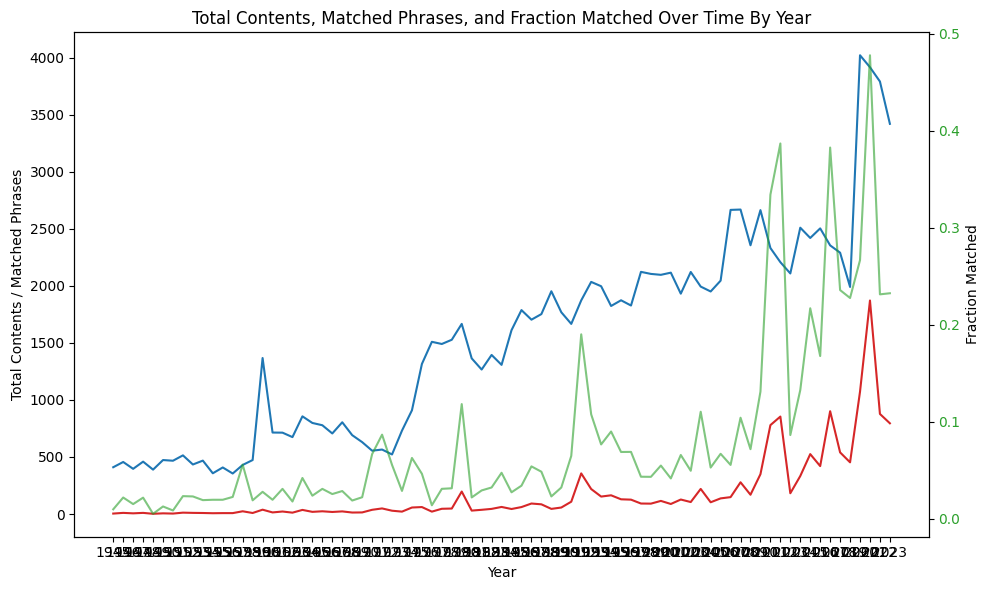

In [23]:
# Plot the yearly total contents, matched phrases, and fraction matched on the same graph

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total contents and matched phrases on the same axis
ax1.plot(yearly_stats['Year'].astype(str), yearly_stats['total_contents'], label='Total Contents', color='tab:blue')
ax1.plot(yearly_stats['Year'].astype(str), yearly_stats['matched_phrases'], label='Matched Phrases', color='tab:red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Contents / Matched Phrases')
ax1.tick_params(axis='y')

# Create a twin axis for fraction of matched phrases
ax2 = ax1.twinx()
ax2.plot(yearly_stats['Year'].astype(str), yearly_stats['fraction_matched'], label='Fraction Matched', color='tab:green', alpha=0.6)
ax2.set_ylabel('Fraction Matched')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Modify xticks to only show the year for cleaner labeling
plt.xticks(ticks=range(len(yearly_stats)), labels=yearly_stats['Year'].astype(str), rotation=45)

plt.title('Total Contents, Matched Phrases, and Fraction Matched Over Time By Year')

fig.tight_layout()
plt.savefig('yearly_stats_plot.png')
plt.show()


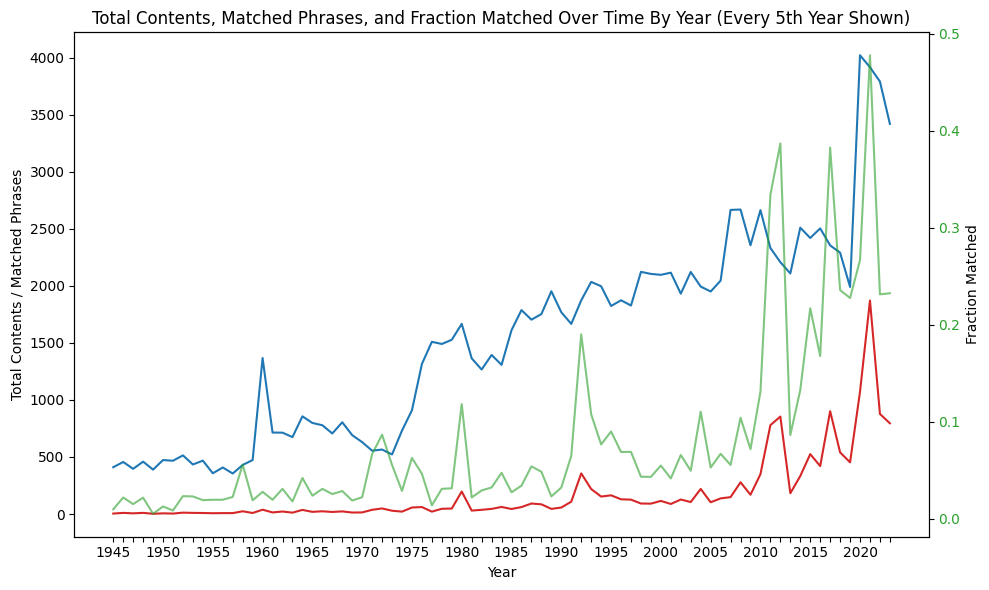

In [24]:
yearly_stats['fraction_matched'] = yearly_stats['matched_phrases'] / yearly_stats['total_contents']

# Create the plot for yearly total contents, matched phrases, and fraction matched on the same graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total contents and matched phrases on the same axis
ax1.plot(yearly_stats['Year'].astype(str), yearly_stats['total_contents'], label='Total Contents', color='tab:blue')
ax1.plot(yearly_stats['Year'].astype(str), yearly_stats['matched_phrases'], label='Matched Phrases', color='tab:red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Contents / Matched Phrases')
ax1.tick_params(axis='y')

# Create a twin axis for fraction of matched phrases
ax2 = ax1.twinx()
ax2.plot(yearly_stats['Year'].astype(str), yearly_stats['fraction_matched'], label='Fraction Matched', color='tab:green', alpha=0.6)
ax2.set_ylabel('Fraction Matched')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Modify xticks to show only every 5th year for cleaner labeling
xticks_labels = [yearly_stats['Year'].iloc[i].astype(str) if i % 5 == 0 else '' for i in range(len(yearly_stats))]
plt.xticks(ticks=range(len(yearly_stats)), labels=xticks_labels, rotation=45)

plt.title('Total Contents, Matched Phrases, and Fraction Matched Over Time By Year (Every 5th Year Shown)')

fig.tight_layout()
plt.savefig('yearly_stats_plot.png')

plt.show()

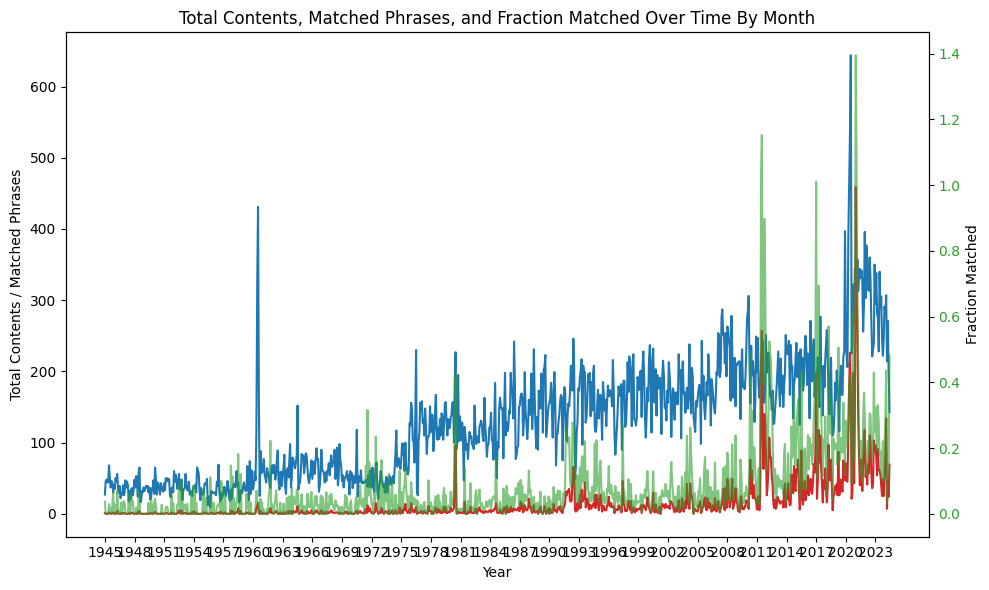

In [25]:
# Convert the 'Month' column to datetime if it's not already
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

# Group by month and calculate the total contents and matched phrases
monthly_stats = df.groupby('Month').agg(
    total_contents=('Content', 'size'),
    matched_phrases=('matches', 'sum')
).reset_index()

# Calculate the fraction of matched phrases
monthly_stats['fraction_matched'] = monthly_stats['matched_phrases'] / monthly_stats['total_contents']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total contents and matched phrases on the same axis
ax1.plot(monthly_stats['Month'], monthly_stats['total_contents'], label='Total Contents', color='tab:blue')
ax1.plot(monthly_stats['Month'], monthly_stats['matched_phrases'], label='Matched Phrases', color='tab:red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Contents / Matched Phrases')
ax1.tick_params(axis='y')

# Create a twin axis for fraction of matched phrases
ax2 = ax1.twinx()
ax2.plot(monthly_stats['Month'], monthly_stats['fraction_matched'], label='Fraction Matched', color='tab:green', alpha=0.6)
ax2.set_ylabel('Fraction Matched')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Modify xticks to only show every 3rd year for cleaner labeling while keeping all data points
xticks_labels = monthly_stats['Month'].dt.strftime('%Y').unique()[::3]  # Show every 3rd year
plt.xticks(ticks=monthly_stats['Month'][::36], labels=xticks_labels, rotation=45)

plt.title('Total Contents, Matched Phrases, and Fraction Matched Over Time By Month')

fig.tight_layout()
plt.show()


# Exploring results

In [26]:
df.shape

(121861, 12)

In [36]:
df.head(20)

,Title,Date,Content,Citation,President,Categories,Attributes,Location,Link,matches,Month,Year
76370,Statement by the President After Taking the Oa...,1945-04-12,THE WORLD may be sure that we will prosecute t...,"Harry S Truman, Statement by the President Aft...",Harry S Truman,"Presidential, Statements,",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...,0,1945-04-01,1945
76371,Harry S Truman Event Timeline,1945-04-12,Harry S. Truman (33) Event Timeline 04/12/1945...,"Harry S Truman, Harry S Truman Event Timeline ...",Harry S Truman,"Timeline,",NaN,NaN,https://www.presidency.ucsb.edu/documents/harr...,0,1945-04-01,1945
76372,Proclamation 2648—Announcing the Death of Fran...,1945-04-13,\nTo the People of the United States:\nIt has ...,"Harry S Truman, Proclamation 2648—Announcing t...",Harry S Truman,"Presidential, Written Presidential Orders, Pro...","Proclamation,",NaN,https://www.presidency.ucsb.edu/documents/proc...,0,1945-04-01,1945
76373,Executive Order 9539—Reinstating Avra M. Warre...,1945-04-13,By virtue of and pursuant to the authority ves...,"Harry S Truman, Executive Order 9539—Reinstati...",Harry S Truman,"Presidential, Written Presidential Orders, Exe...","Executive Orders,",NaN,https://www.presidency.ucsb.edu/documents/exec...,0,1945-04-01,1945
76374,Executive Order 9538—Authorizing Certification...,1945-04-13,By virtue of the authority vested in me by sec...,"Harry S Truman, Executive Order 9538—Authorizi...",Harry S Truman,"Presidential, Written Presidential Orders, Exe...","Executive Orders,",NaN,https://www.presidency.ucsb.edu/documents/exec...,0,1945-04-01,1945
76375,Address Before a Joint Session of the Congress,1945-04-16,"Mr. Speaker, Mr. President, Members of the Con...","Harry S Truman, Address Before a Joint Session...",Harry S Truman,"Presidential, Spoken Addresses and Remarks, to...","to the Congress, , LocationWashington, DC","Washington, DC",https://www.presidency.ucsb.edu/documents/addr...,0,1945-04-01,1945
76380,The President's News Conference,1945-04-17,THE PRESIDENT. [1.] The first thing I want to ...,"Harry S Truman, The President's News Conferenc...",Harry S Truman,"Presidential, Spoken Addresses and Remarks, Ne...",NaN,"Washington, DC",https://www.presidency.ucsb.edu/documents/the-...,0,1945-04-01,1945
76378,Address Broadcast to the Armed Forces.,1945-04-17,To the Armed Forces of the United States throu...,"Harry S Truman, Address Broadcast to the Armed...",Harry S Truman,"Presidential, Spoken Addresses and Remarks, , ...",NaN,"Washington, DC",https://www.presidency.ucsb.edu/documents/addr...,1,1945-04-01,1945
76379,Executive Order 9540—Authorizing the Petroleum...,1945-04-17,Whereas after investigation I find and proclai...,"Harry S Truman, Executive Order 9540—Authorizi...",Harry S Truman,"Presidential, Written Presidential Orders, Exe...","Executive Orders,",NaN,https://www.presidency.ucsb.edu/documents/exec...,0,1945-04-01,1945
76376,Statement by the President Upon Signing Bill E...,1945-04-17,THIS IS the third time that the Lend-Lease Act...,"Harry S Truman, Statement by the President Upo...",Harry S Truman,"Presidential, Statements, Signing Statements, ...","Bill Signing,",NaN,https://www.presidency.ucsb.edu/documents/stat...,0,1945-04-01,1945


In [37]:
n = 50

# Find the top 3 months with the highest total_contents
top_total_contents = monthly_stats.nlargest(n, 'total_contents')

# Find the top 3 months with the highest matched_phrases
top_matched_phrases = monthly_stats.nlargest(n, 'matched_phrases')

# Display the results
print(f"Top {n} months by total contents:")
print(top_total_contents[['Month', 'total_contents']])

print(f"\nTop {n} months by matched phrases:")
print(top_matched_phrases[['Month', 'matched_phrases']])


Top 50 months by total contents:
       Month  total_contents
865  2020-10             644
864  2020-09             535
863  2020-08             466
186  1960-10             431
858  2020-03             397
882  2022-03             396
862  2020-07             387
884  2022-05             377
888  2022-09             360
873  2021-06             357
885  2022-06             355
894  2023-03             350
870  2021-03             344
876  2021-09             344
878  2021-11             342
900  2023-09             340
896  2023-05             338
877  2021-10             331
875  2021-08             330
871  2021-04             329
879  2021-12             328
889  2022-10             328
185  1960-09             322
868  2021-01             322
886  2022-07             316
874  2021-07             313
887  2022-08             313
872  2021-05             309
908  2024-05             307
741  2010-06             306
902  2023-11             305
883  2022-04             303
881  2022-

In [22]:
n = 10  # Top 10 years

# Find the top 10 years with the highest total_contents
top_total_contents = yearly_stats.nlargest(n, 'total_contents')

# Find the top 10 years with the highest matched_phrases
top_matched_phrases = yearly_stats.nlargest(n, 'matched_phrases')

# Display the results
print(f"Top {n} years by total contents:")
print(top_total_contents[['Year', 'total_contents']])

print(f"\nTop {n} years by matched phrases:")
print(top_matched_phrases[['Year', 'matched_phrases']])


Top 10 years by total contents:
    Year  total_contents
31  2020            4020
32  2021            3914
33  2022            3790
34  2023            3419
21  2010            2663
25  2014            2509
27  2016            2502
26  2015            2419
28  2017            2354
22  2011            2330

Top 10 years by matched phrases:
    Year  matched_phrases
32  2021             2037
31  2020             1496
28  2017             1122
33  2022             1036
23  2012              995
34  2023              934
22  2011              914
29  2018              833
30  2019              783
26  2015              714


In [56]:
# Function to find and return the matched phrases from the Content
def find_matched_phrases(text, pattern):
    return pattern.findall(text)

# Apply the function to extract matched phrases for each row
df['matched_phrases_list'] = df['Content'].apply(lambda x: find_matched_phrases(x, miu_regex))

In [57]:
# Drop Month and Year columns if they exist
# df = df.drop(columns=['Month', 'Year'], errors='ignore')

df

,Title,Date,Content,Citation,President,Categories,Attributes,Location,Link,matches,Month,Year,matched_phrases_list
83604,Harry S Truman Event Timeline,1945-04-12,Harry S. Truman (33) Event Timeline 04/12/1945...,"Harry S Truman, Harry S Truman Event Timeline ...",Harry S Truman,"Timeline,",NaN,NaN,https://www.presidency.ucsb.edu/documents/harr...,0,1945-04-01,1945,[]
83603,Statement by the President After Taking the Oa...,1945-04-12,THE WORLD may be sure that we will prosecute t...,"Harry S Truman, Statement by the President Aft...",Harry S Truman,"Presidential, Statements,",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...,0,1945-04-01,1945,[]
83607,Executive Order 9538—Authorizing Certification...,1945-04-13,By virtue of the authority vested in me by sec...,"Harry S Truman, Executive Order 9538—Authorizi...",Harry S Truman,"Presidential, Written Presidential Orders, Exe...","Executive Orders,",NaN,https://www.presidency.ucsb.edu/documents/exec...,0,1945-04-01,1945,[]
83605,Proclamation 2648—Announcing the Death of Fran...,1945-04-13,\nTo the People of the United States:\nIt has ...,"Harry S Truman, Proclamation 2648—Announcing t...",Harry S Truman,"Presidential, Written Presidential Orders, Pro...","Proclamation,",NaN,https://www.presidency.ucsb.edu/documents/proc...,0,1945-04-01,1945,[]
83606,Executive Order 9539—Reinstating Avra M. Warre...,1945-04-13,By virtue of and pursuant to the authority ves...,"Harry S Truman, Executive Order 9539—Reinstati...",Harry S Truman,"Presidential, Written Presidential Orders, Exe...","Executive Orders,",NaN,https://www.presidency.ucsb.edu/documents/exec...,0,1945-04-01,1945,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25510,Press Briefing by Press Secretary Karine Jean-...,2024-09-19,James S. Brady Press Briefing Room\n2:42 P.M. ...,"Joseph R. Biden, Press Briefing by Press Secre...",Joseph R. Biden,"Press Office, Press Briefings, Watch Video, Lo...",NaN,"Washington, DC",https://www.presidency.ucsb.edu/documents/pres...,2,2024-09-01,2024,"[American workers, American workers]"
25511,Statement by Press Secretary Karine Jean-Pierr...,2024-09-19,"On September 23, President Biden will welcome ...","Joseph R. Biden, Statement by Press Secretary ...",Joseph R. Biden,"Press Office, Statements by the Press Secretary,",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...,0,2024-09-01,2024,[]
25512,Statement by Press Secretary Karine Jean-Pierr...,2024-09-19,"On Thursday, September 26, President Biden wil...","Joseph R. Biden, Statement by Press Secretary ...",Joseph R. Biden,"Press Office, Statements by the Press Secretary,",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...,0,2024-09-01,2024,[]
25513,"Proclamation—National POW/MIA Recognition Day,...",2024-09-19,By the President of the United States of Ameri...,"Joseph R. Biden, Proclamation—National POW/MIA...",Joseph R. Biden,"Presidential, Written Presidential Orders, Pro...","Proclamation,",NaN,https://www.presidency.ucsb.edu/documents/proc...,1,2024-09-01,2024,[patriots]


In [58]:
df.to_csv('documents_with_matched_phrases.csv', index=False)

In [10]:
df = pd.read_csv('documents_data.csv')

In [11]:
df.shape

(121861, 9)

In [12]:
df.sample(5)

,Title,Date,Content,Citation,President,Categories,Attributes,Location,Link
115846,Statement of Administration Policy: H.R. 2372 ...,1985-07-31,\n(House Rules) (Florio (D) New Jersey and 4 o...,"Ronald Reagan, Statement of Administration Pol...",Ronald Reagan,"OMB: Office of Management and Budget, Stateme...",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...
48074,Readout of the President's Meeting on the Dome...,2014-10-17,The President this afternoon convened a meetin...,"Barack Obama, Readout of the President's Meeti...",Barack Obama,"Press Office, Press Releases, Readouts,","Readouts,",NaN,https://www.presidency.ucsb.edu/documents/read...
83965,Letter to Senator Wagner and Representative Ma...,1945-12-20,Dear______________:\nThe Full Employment Bill ...,"Harry S Truman, Letter to Senator Wagner and R...",Harry S Truman,"Presidential, Letters, to the Congress,","to the Congress,",NaN,https://www.presidency.ucsb.edu/documents/lett...
62559,Remarks at a Democratic National Committee Dinner,1998-10-07,"Thank you very much. Ron, thank you for those ...","William J. Clinton, Remarks at a Democratic Na...",William J. Clinton,"Presidential, Spoken Addresses and Remarks, Pa...","Party Fundraiser, , LocationWashington, DC","Washington, DC",https://www.presidency.ucsb.edu/documents/rema...
52389,Exchange With Reporters at the Demilitarized Zone,1993-07-11,North Korea\nQ. How many more years do you thi...,"William J. Clinton, Exchange With Reporters at...",William J. Clinton,"Presidential, Spoken Addresses and Remarks, Ex...","Exchange with Reporters, , LocationSouth Korea",South Korea,https://www.presidency.ucsb.edu/documents/exch...


In [14]:
df

,Title,Date,Content,Citation,President,Categories,Attributes,Location,Link,matches,Month,Year
44170,Remarks Announcing Candidacy for the Democrati...,1991-10-03,"Thank you all for being here today, for your f...","William J. Clinton, Remarks Announcing Candida...",William J. Clinton,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies, Candidacy Announce...",Arkansas,https://www.presidency.ucsb.edu/documents/rema...,0,1991-10-01,1991
44171,Address Accepting the Presidential Nomination ...,1992-07-16,"Governor Richards, Chairman Brown, Mayor Dinki...","William J. Clinton, Address Accepting the Pres...",William J. Clinton,"Presidential Candidates, Spoken Addresses and ...","Campaign Remarks & Rallies, Convention Speeche...",New York,https://www.presidency.ucsb.edu/documents/addr...,4,1992-07-01,1992
44172,Excerpts of Remarks in Milwaukee,1992-10-02,No American foreign policy can succeed if it n...,"William J. Clinton, Excerpts of Remarks in Mil...",William J. Clinton,"Presidential Candidates, Elections and Transit...","Campaign Remarks & Rallies, , LocationWisconsin",Wisconsin,https://www.presidency.ucsb.edu/documents/exce...,0,1992-10-01,1992
44173,"Address in Little Rock, Arkansas Accepting Ele...",1992-11-03,Thank you very much. Thank you. Thank you. [ s...,"William J. Clinton, Address in Little Rock, Ar...",William J. Clinton,"President-elect, Spoken Addresses and Remarks,...","Campaign Remarks & Rallies, Election Victory, ...",Arkansas,https://www.presidency.ucsb.edu/documents/addr...,4,1992-11-01,1992
44174,Excerpts of Remarks in Little Rock,1992-11-04,"Good afternoon. Ladies and gentlemen, I have j...","William J. Clinton, Excerpts of Remarks in Lit...",William J. Clinton,"Elections and Transitions, Transition Document...",NaN,Arkansas,https://www.presidency.ucsb.edu/documents/exce...,0,1992-11-01,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
25509,"Proclamation—National Service Dog Day, 2024",2024-09-19,By the President of the United States of Ameri...,"Joseph R. Biden, Proclamation—National Service...",Joseph R. Biden,"Presidential, Written Presidential Orders, Pro...","Proclamation,",NaN,https://www.presidency.ucsb.edu/documents/proc...,0,2024-09-01,2024
25510,Press Briefing by Press Secretary Karine Jean-...,2024-09-19,James S. Brady Press Briefing Room\n2:42 P.M. ...,"Joseph R. Biden, Press Briefing by Press Secre...",Joseph R. Biden,"Press Office, Press Briefings, Watch Video, Lo...",NaN,"Washington, DC",https://www.presidency.ucsb.edu/documents/pres...,2,2024-09-01,2024
25511,Statement by Press Secretary Karine Jean-Pierr...,2024-09-19,"On September 23, President Biden will welcome ...","Joseph R. Biden, Statement by Press Secretary ...",Joseph R. Biden,"Press Office, Statements by the Press Secretary,",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...,0,2024-09-01,2024
25512,Statement by Press Secretary Karine Jean-Pierr...,2024-09-19,"On Thursday, September 26, President Biden wil...","Joseph R. Biden, Statement by Press Secretary ...",Joseph R. Biden,"Press Office, Statements by the Press Secretary,",NaN,NaN,https://www.presidency.ucsb.edu/documents/stat...,0,2024-09-01,2024


In [13]:
# Get rows with matched phrases (where 'matches' > 0)
matched_phrases_df = df[df['matches'] > 10]

# Get rows with no matched phrases (where 'matches' == 0)
not_matched_phrases_df = df[df['matches'] == 0]

# Show examples of matched phrases
print("Examples of Matched Phrases:")
print(matched_phrases_df[['Date', 'Content', 'matched_phrases_list']].head(5))  # Display first 5 examples

# Show examples of not matched phrases
print("\nExamples of Not Matched Phrases:")
print(not_matched_phrases_df[['Date', 'Content']].head(5))  # Display first 5 examples


Examples of Matched Phrases:
            Date                                            Content  \
41081 1991-02-15  Listen, I came up here to thank you guys, but ...   
60265 1997-09-11  By the authority vested in me as President by ...   
26079 2008-05-14  At Macomb Community College, Obama outlines pl...   
26076 2008-05-14  Earlier today, I went for a tour of the Chrysl...   
26151 2008-06-30  On a spring morning in April of 1775, a simple...   

                                    matched_phrases_list  
41081  [Patriot, Patriot, Patriot, patriots, American...  
60265  [American Heritage, American Heritage, America...  
26079  [American workers, American manufacturing, Ame...  
26076  [American workers, American manufacturing, Ame...  
26151  [patriots, patriotism, patriotism, patriot, pa...  

Examples of Not Matched Phrases:
            Date                                            Content
37278 1980-07-17  Just a few minutes before he appeared at the c...
37279 1981-03-30  We

In [14]:
print(matched_phrases_df.iloc[1][['Content', 'matched_phrases_list']])

Content                 By the authority vested in me as President by ...
matched_phrases_list    [American Heritage, American Heritage, America...
Name: 60265, dtype: object


In [15]:
print(matched_phrases_df.iloc[4]['Content'])
print(matched_phrases_df.iloc[4]['matched_phrases_list'])

On a spring morning in April of 1775, a simple band of colonists – farmers and merchants, blacksmiths and printers, men and boys – left their homes and families in Lexington and Concord to take up arms against the tyranny of an Empire. The odds against them were long and the risks enormous – for even if they survived the battle, any ultimate failure would bring charges of treason, and death by hanging.
And yet they took that chance. They did so not on behalf of a particular tribe or lineage, but on behalf of a larger idea. The idea of liberty. The idea of God-given, inalienable rights. And with the first shot of that fateful day – a shot heard round the world – the American Revolution, and America's experiment with democracy, began.
Those men of Lexington and Concord were among our first patriots. And at the beginning of a week when we celebrate the birth of our nation, I think it is fitting to pause for a moment and reflect on the meaning of patriotism – theirs, and ours. We do so in 

In [16]:
# Filter for rows in April 2021 with more than 10 matched phrases
april_2021_df = df[(df['Month'] == '2021-04') & (df['matches'] > 5)]

# Show examples of documents in April 2021 with matched phrases
print("Documents from April 2021 with matched phrases (more than 10 matches):")
print(april_2021_df[['Date', 'Content', 'matched_phrases_list']])  # Display all relevant columns


Documents from April 2021 with matched phrases (more than 10 matches):
            Date                                            Content  \
13319 2021-04-01  James S. Brady Press Briefing Room\n1:44 P.M. ...   
13314 2021-04-01  Following yesterday's announcement of the Amer...   
13308 2021-04-01  Pool Reports by Natasha Korecki , POLITICO\nSe...   
13332 2021-04-02  James S. Brady Press Briefing Room\n12:33 P.M....   
13352 2021-04-06  James S. Brady Press Briefing Room\n12:15 P.M....   
13363 2021-04-07  James S. Brady Press Briefing Room\n**See corr...   
13372 2021-04-08  James S. Brady Press Briefing Room\n12:44 P.M....   
13387 2021-04-09  James S. Brady Press Briefing Room\n12:33 P.M....   
13379 2021-04-09  New York Times columnist and Nobel Prize winni...   
13405 2021-04-12  The President. Well, look, the reason I'm here...   
13417 2021-04-13  As we emerge from the pandemic, 10 million are...   
13416 2021-04-13  Following the release of state-by-state fact s...   
13415 

In [17]:
print(april_2021_df.iloc[10]['Content'])
print(april_2021_df.iloc[10]['matched_phrases_list'])

As we emerge from the pandemic, 10 million are still unemployed. The American Jobs Plan will create blue-collar jobs. For those who need training, President Biden's plan will provide it.
Throughout our nation's history, often in times of war or economic crisis, critical investments have driven much-needed job creation — leaving both our nation's infrastructure and our nation's workforce stronger.
When President Abraham Lincoln started construction on the transcontinental railroad during the Civil War, to connect the East Coast to the West, jobs opened up for blacksmiths and carpenters. When President Herbert Hoover started construction on the Hoover Dam during the Great Depression, to generate power for multiple states, unemployed workers flocked to Nevada to join the team.
As we emerge from the pandemic, at least 10 million Americans are still unemployed — many worked in lower-wage jobs and more than 4 million have been out of work for more than 27 weeks.
Recently, President Joe Biden

In [27]:
# Filter for rows in April 2021 with more than 1 matched phrase
filtered_df = df[(df['matches'] > 1)]

# Get 10 examples of phrases and their matched phrases
example_phrases_df = filtered_df[['Date', 'Content', 'matched_phrases_list']].sample(20)

# Save the 10 examples to a CSV file for better understanding
example_phrases_df.to_csv('example_phrases_and_matches.csv', index=False)

# Display the examples to verify
print("10 examples of documents with matched phrases (more than 1 match):")
print(example_phrases_df)


10 examples of documents with matched phrases (more than 1 match):
            Date                                            Content  \
34553 2012-07-13  The President. Hello, Roanoke! It is good to b...   
21280 2023-05-16  Pool Reports by Todd J. Gillman , The Dallas M...   
37213 2017-01-12  America succeeds when our workers and business...   
34742 2012-08-08  The President. Hello, Colorado! It is good to ...   
14677 2021-08-06  This week, members of President Biden's Cabine...   
58656 1996-09-26  Thank you. I want you to save some of that ene...   
55448 1995-01-23  The Briefing Room\n1:09 P.M. EST\nQ: What's in...   
28904 2010-03-01  \nFrom long before American independence to to...   
1117  2017-04-29  The President. Thank you, everybody, very much...   
22639 2023-10-12  Across America, President Biden's Investing in...   
20253 2023-02-03  Pool Reports by Christopher Kane , Washington ...   
22947 2023-11-11  Thank you. Thank you, thank you, thank you.\nM...   
15587 2021

In [25]:
example_phrases_df.iloc[6]['Content']

'Welcome to the Rose Garden, ladies and gentlemen and fellow Americans. You know, an Asian proverb says: "Intelligence consists in recognizing opportunity." Well, if that\'s true, it\'s clear that we are recognizing opportunity in putting the flag back where it belongs. [Laughter] No, intelligence consists in recognizing opportunity, and it\'s clear that you may be one of the most intelligent groups that we\'ve welcomed to the White House, for you\'ve recognized opportunity and seized it. And I am just delighted to be with you.\nI\'d like to welcome a very special visitor, President Hammer DeRoburt of Nauru out in the Pacific -- a friend of the United States. Welcome, sir. And I think it\'s appropriate he\'s here, head of an island state in the Pacific -- most appropriate that you join us here today, sir. Thank you.\nWe gather in a special week: Asian/Pacific American Heritage Week. And yesterday marked the 146th anniversary of the day the first Japanese immigrated to America; and Wedn

In [26]:
example_phrases_df.iloc[6]['matched_phrases_list']

['American Heritage',
 'American Heritage',
 'American Heritage',
 'American Heritage']